# Project2 - Thera bank

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

1. Read the column description and ensure you understand each attribute well
2. Study the data distribution in each attribute, share your findings. (5 points)
3. Get the target column distribution. Your comments
4. Split the data into training and test set in the ratio of 70:30 respectively
5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)
6. Print the confusion matrix for all the above models (5 points)
7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)

### 1. Import required libraries, load thera bank data set and perform EDA

In [2]:
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
#Scikit learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [4]:
# Load the data set
thera_bank_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
thera_bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<b>Attribute values vary in scale</b> ZIP code value is very high compare to other attribute values. 

In [7]:
#Finding are there any missing values
thera_bank_df.shape

(5000, 14)

In [8]:
thera_bank_df.count()

ID                    5000
Age                   5000
Experience            5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

 All the attributes are having same count of values - <b> No missing values </b>

In [10]:
thera_bank_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


All are <b>contineous values, no categorical values</b> are observed

In [11]:
thera_bank_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

### 2. Study the data distribution in each attribute, share your findings. (5 points)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1fcb0f90>,
      dtype=object)

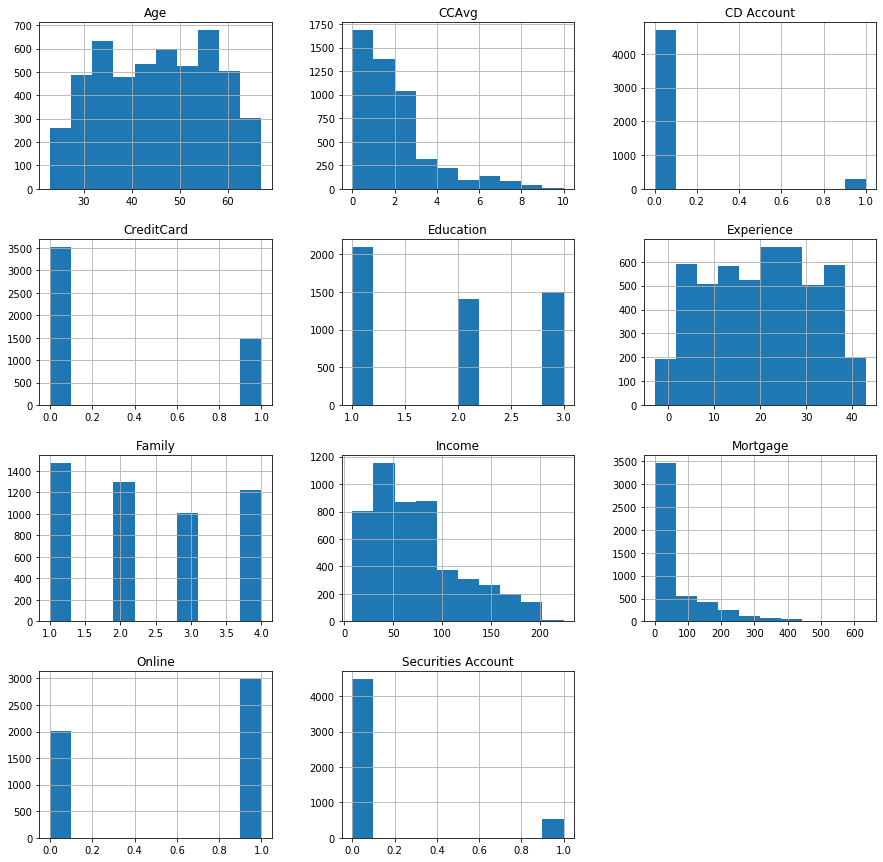

In [19]:
thera_bank_df.hist(figsize=(15,15), column=['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard'])

<b> Attribute data distributions </b>
1. CCAvg, income and Mortgage attribtues are right skewed
2. CD Account, CreditCard, Online and Securities Account attribute have values Either 0 or 1. They have unimode distribution
3. Both Age and Experince attributes are having bimode bell curve distribution
4. Education and Family attributes have multimode distributions

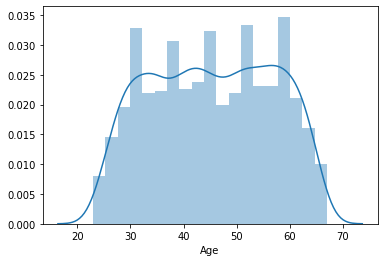

In [22]:
sns.distplot(thera_bank_df['Age'])

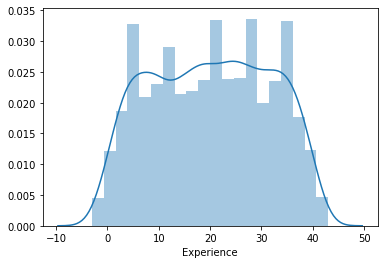

In [23]:
sns.distplot(thera_bank_df['Experience'])

### 3. Get the target column distribution. Your comments

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1fc17a50>]],
      dtype=object)

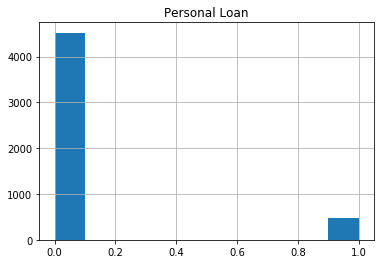

In [25]:
thera_bank_df.hist( column=['Personal Loan'])

<b> Target column distribution analysise </b>
1. Its unimode distribution 
2. Only 2 values are there
3. It's a right skewed distribution

#### Correlation between attributes
There is considerable correlation between
1. Age and Experience
2. Income and CCAvg
3. Income and Personal loan

In [28]:
thera_bank_df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


### 4. Split the data into training and test set in the ratio of 70:30 respectively

In [30]:
# Feature set
X = thera_bank_df.drop('Personal Loan', axis=1)

#Target set is 'Personal Loan'
y = thera_bank_df['Personal Loan']

print('Feature set size - ', X.shape)
print('Target set size - ', y.shape)

Feature set size -  (5000, 13)
Target set size -  (5000,)


<b>Standardize the data</b> to make uniform scale for all attributes

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

### 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)

##### 1. Logistic regression

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model_lg = LogisticRegression()
model_lg.fit(X_train, y_train)
print("Train set accuracy score - ", model_lg.score(X_train, y_train))
print("Test set accuracy score - ", model_lg.score(X_test, y_test))

Train set accuracy score -  0.9117142857142857
Test set accuracy score -  0.9006666666666666


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


##### 2. K-NN
Finding the best KNN value

In [82]:
from sklearn.neighbors import KNeighborsClassifier
def get_newaccuracy_score(k_value):
    model_knn_find = KNeighborsClassifier(n_neighbors= k_value, weights = 'uniform', metric='euclidean')
    model_knn_find.fit(X_train, y_train)
    accuracy_score_train = model_knn_find.score(X_train, y_train)
    accuracy_score_test = model_knn_find.score(X_test, y_test)
    return [accuracy_score_train,accuracy_score_test]

In [83]:
result_class = []
kNumber_range = pd.Series(range(1,20))
for x in kNumber_range:
    y_acc_Train, y_acc_Test = get_newaccuracy_score(x)
    result_class.append({'KNN': x, 'Train_acc': y_acc_Train, 'Test_acc': y_acc_Test})
acc_dist = pd.DataFrame(result_class)

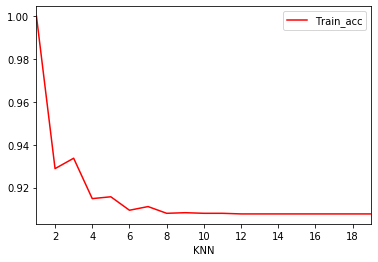

In [84]:
acc_dist.plot(x='KNN',y='Train_acc',color='red')
plt.show()

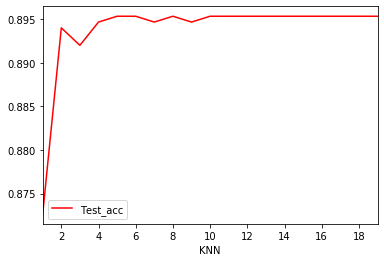

In [85]:
acc_dist.plot(x='KNN',y='Test_acc',color='red')
plt.show()

###### KNN gives best accuracy between test and traing with KNN value 8 to 10. Considering KNN value as 8 to compare accuracy scores of multiple algos

In [86]:
model_knn = KNeighborsClassifier(n_neighbors = 8, weights = 'uniform', metric='euclidean')
model_knn.fit(X_train, y_train)
print("Train set accuracy score - ", model_knn.score(X_train, y_train))
print("Test set accuracy score - ", model_knn.score(X_test, y_test))

Train set accuracy score -  0.908
Test set accuracy score -  0.8953333333333333


##### 3. Naïve Bayes

In [89]:
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)
print("Train set accuracy score - ", model_gnb.score(X_train, y_train))
print("Test set accuracy score - ", model_gnb.score(X_test, y_test))

Train set accuracy score -  0.8891428571428571
Test set accuracy score -  0.896


### 6. Print the confusion matrix for all the above models (5 points)

##### 1. Logistic regression

In [87]:
y_lg_train_predict = model_lg.predict(X_train)
y_lg_test_predict = model_lg.predict(X_test)
print("**********Train set confusion matrix ***************\n")
print(metrics.confusion_matrix(y_train, y_lg_train_predict))
print(metrics.classification_report(y_train, y_lg_train_predict))
print("\n**********Test set confusion matrix ***************\n")
print(metrics.confusion_matrix(y_test, y_lg_test_predict))
print(metrics.classification_report(y_test, y_lg_test_predict))

**********Train set confusion matrix ***************

[[3091   86]
 [ 223  100]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3177
           1       0.54      0.31      0.39       323

    accuracy                           0.91      3500
   macro avg       0.74      0.64      0.67      3500
weighted avg       0.90      0.91      0.90      3500


**********Test set confusion matrix ***************

[[1304   39]
 [ 110   47]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1343
           1       0.55      0.30      0.39       157

    accuracy                           0.90      1500
   macro avg       0.73      0.64      0.67      1500
weighted avg       0.88      0.90      0.89      1500



##### 2. K-NN

In [88]:
y_knn_train_predict = model_knn.predict(X_train)
y_knn_test_predict = model_knn.predict(X_test)
print("**********Train set confusion matrix ***************\n")
print(metrics.confusion_matrix(y_train, y_knn_train_predict))
print(metrics.classification_report(y_train, y_knn_train_predict))
print("\n**********Test set confusion matrix ***************\n")
print(metrics.confusion_matrix(y_test, y_knn_test_predict))
print(metrics.classification_report(y_test, y_knn_test_predict))

**********Train set confusion matrix ***************

[[3177    0]
 [ 322    1]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3177
           1       1.00      0.00      0.01       323

    accuracy                           0.91      3500
   macro avg       0.95      0.50      0.48      3500
weighted avg       0.92      0.91      0.86      3500


**********Test set confusion matrix ***************

[[1343    0]
 [ 157    0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.94      1343
           1       0.00      0.00      0.00       157

    accuracy                           0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.80      0.90      0.85      1500



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##### 3. Naïve Bayes

In [90]:
y_gnb_train_predict = model_gnb.predict(X_train)
y_gnb_test_predict = model_gnb.predict(X_test)
print("**********Train set confusion matrix ***************\n")
print(metrics.confusion_matrix(y_train, y_gnb_train_predict))
print(metrics.classification_report(y_train, y_gnb_train_predict))
print("\n**********Test set confusion matrix ***************\n")
print(metrics.confusion_matrix(y_test, y_gnb_test_predict))
print(metrics.classification_report(y_test, y_gnb_test_predict))

**********Train set confusion matrix ***************

[[2922  255]
 [ 133  190]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      3177
           1       0.43      0.59      0.49       323

    accuracy                           0.89      3500
   macro avg       0.69      0.75      0.72      3500
weighted avg       0.91      0.89      0.90      3500


**********Test set confusion matrix ***************

[[1250   93]
 [  63   94]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1343
           1       0.50      0.60      0.55       157

    accuracy                           0.90      1500
   macro avg       0.73      0.76      0.74      1500
weighted avg       0.90      0.90      0.90      1500



### 7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)

##### Models accuracy score - 
Logistic regression has slightly better train accuracy compare to other models<br>
KNN has slightly better test accuracy compare to other models<br>
1. Logistic - [Test - 0.900] [Train - 0.911]
2. KNN - [Test - 0.908] [Train - 0.895]
3. Naive Bayes - [Test - 0.889] [Train - 0.896]

##### Precision, Recall and F-score
Objective is to identify potential takers of Personal loan <br>
Precision - is about prediction is yes and how often its yes<br>
Recall - is about when its actual Yes and how often its predicted as yes<br>

### Best model prediction is Naive Bayes, because for Personal Loan classification 1, NB gives better precision and recall compare to other models
#### KNN is has bad prediction for Personal Local classification 1, it has high accuracy for personal loan classification 0

<b> Here are the reports of classification 1 of personal Loan attribute </b><br>
1. Logistic
                precision    recall  f1-score   support

           0       0.92      0.97      0.95      1343
           1       0.55      0.30      0.39       157
2. KNN
                 precision    recall  f1-score   support

           0       0.90      1.00      0.94      1343
           1       0.00      0.00      0.00       157
3. Naive Bayes
                 precision    recall  f1-score   support

           0       0.95      0.93      0.94      1343
           1       0.50      0.60      0.55       157